In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)

In [2]:
# Read in Data
df = pd.read_csv("C:/Users/avnit/Downloads/movies.csv/movies.csv")
df.tail(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [3]:
# Missing data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [4]:
df['budget'].isnull().count()


7668

In [5]:
# Replace NAN values with 0
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [6]:
# Check the data types of each columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Convert the data types of column budget and gross to integer
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
# Again checking it whether it is converted or not?
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,696,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,183,39
3045,6896,5,6,1997,703,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,704,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,698,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,192,38


In [10]:
df['date_released'] = df['released'].astype(str)

In [11]:
df['released'] = df['released'].str.replace(r'\s*\(United States\)', '')

C:\Users\avnit\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
df['Year'] = df['released'].str.extract(r'(\d{4})')

In [29]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,696,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,183,39
3045,6896,5,6,1997,703,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,704,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,698,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,192,38


In [14]:
df=df.sort_values(by = ['gross'],inplace = False,ascending = False)

In [15]:
pd.set_option('display.max_rows',None)

In [16]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [30]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,696,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,183,39
3045,6896,5,6,1997,703,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,704,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,698,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,192,38


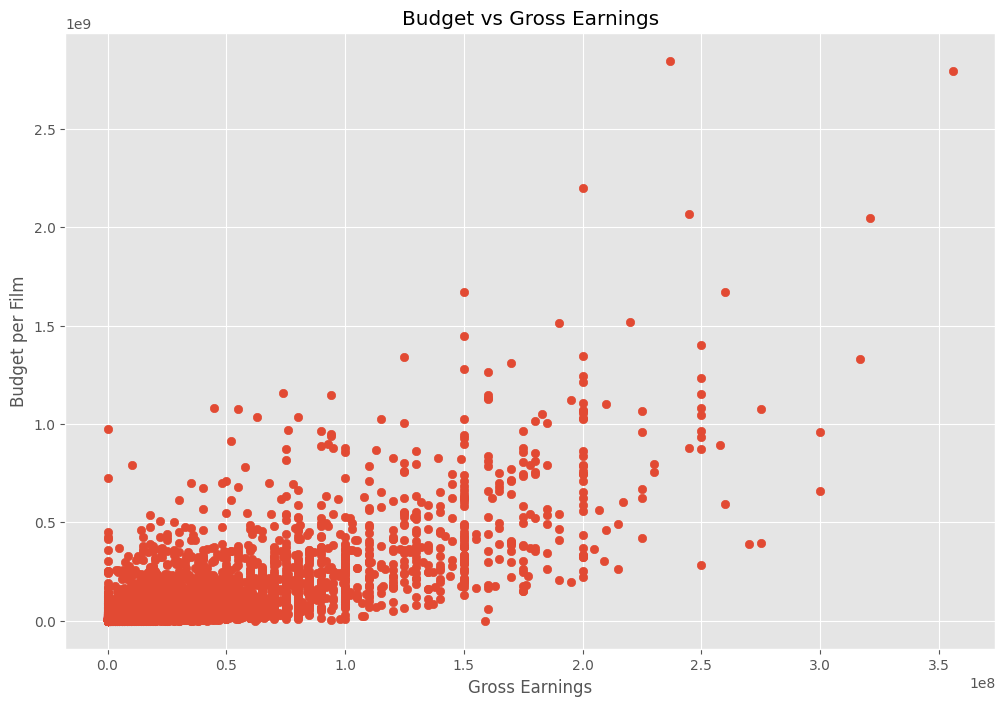

In [18]:
# Show a scatter plot for budget and gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget per Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

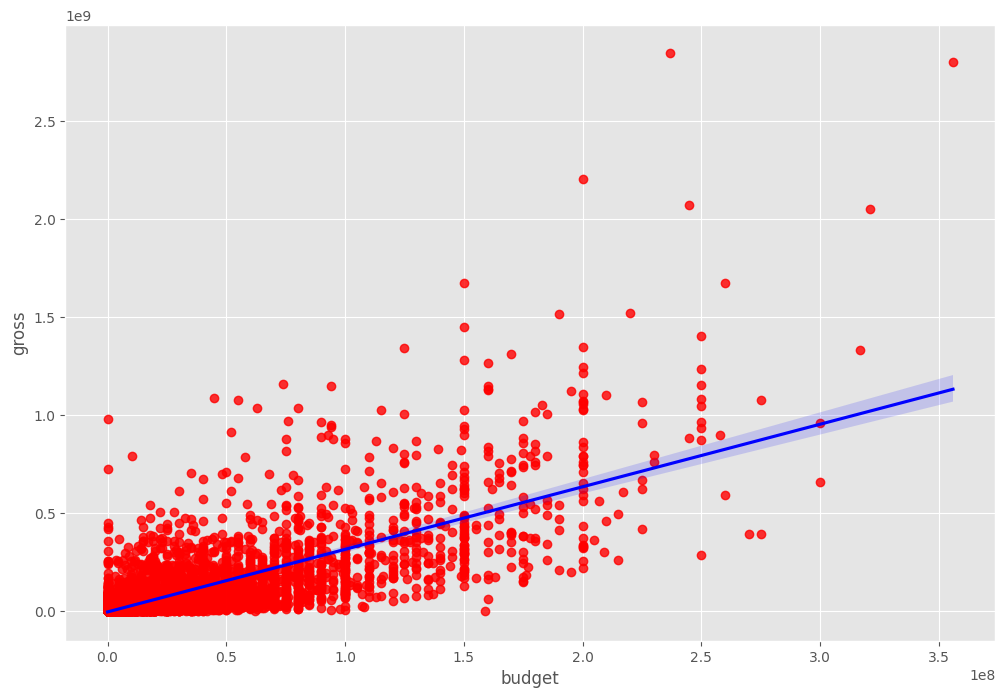

In [19]:
# Plot the Budget vs Gross

sns.regplot(x='budget', y = 'gross',data = df,scatter_kws = {"color":"red"},line_kws={"color":"blue"})

In [20]:
# Let's start looking at correlation

df.corr(method = 'pearson')# pearson,kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


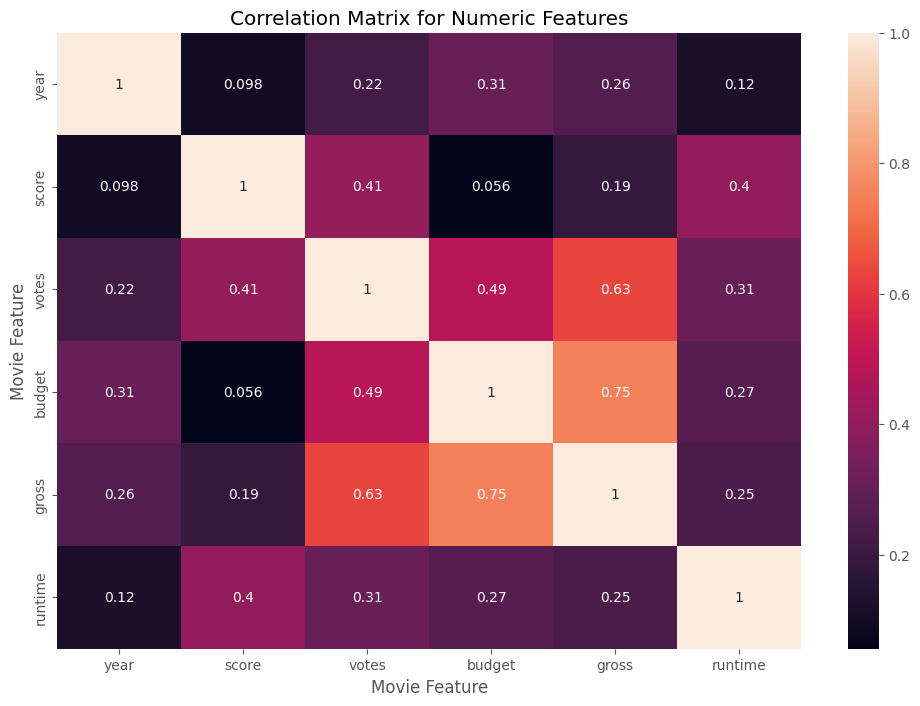

In [21]:
# Visualization of correlation matrix

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")
plt.show()

In [31]:
# Let's look at company's column

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,696,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,183,39
3045,6896,5,6,1997,703,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,704,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,698,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,192,38


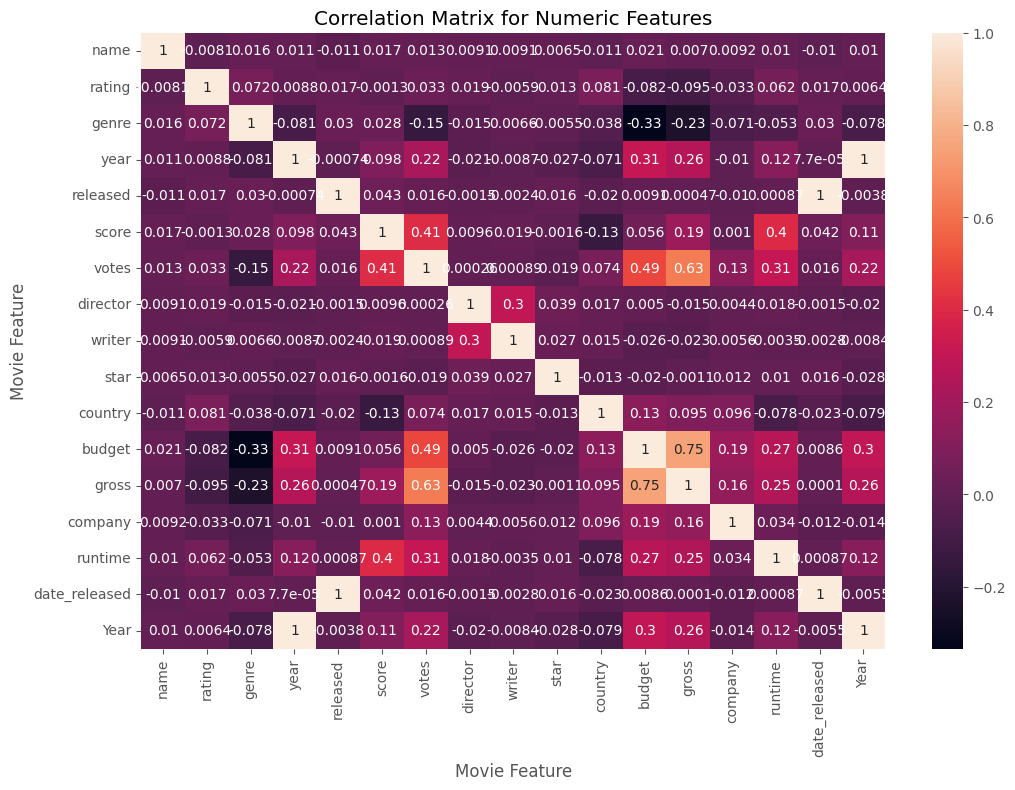

In [24]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")
plt.show()

In [25]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011313
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.020548
               gross            0.006989
               company          0.009211
               runtime          0.010392
               date_released   -0.010480
               Year             0.010225
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.008779
               released         0.016610
               score           -0.001314
               votes            0.033225
               d

In [26]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre          budget          -0.334021
budget         genre           -0.334021
genre          gross           -0.234297
gross          genre           -0.234297
genre          votes           -0.145307
votes          genre           -0.145307
score          country         -0.133348
country        score           -0.133348
gross          rating          -0.095450
rating         gross           -0.095450
               budget          -0.081939
budget         rating          -0.081939
genre          year            -0.081261
year           genre           -0.081261
Year           country         -0.079009
country        Year            -0.079009
               runtime         -0.078412
runtime        country         -0.078412
genre          Year            -0.078210
Year           genre           -0.078210
company        genre           -0.071067
genre          company         -0.071067
year           country         -0.070938
country        year            -0.070938
runtime        g

In [27]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross          votes            0.632834
votes          gross            0.632834
gross          budget           0.750157
budget         gross            0.750157
Year           year             0.996397
year           Year             0.996397
released       date_released    0.998458
date_released  released         0.998458
name           name             1.000000
writer         writer           1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
date_released  date_released    1.000000
Year           Y

In [ ]:
# gross and votes has highest correlation
# Company has low correlation